# EDA, 전처리(Tree 알고리즘용)

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [112]:
train = pd.read_csv('C:\\Users\\82102\\Desktop\\Machine_Learning\\DACON_materials\\Income_Prediction\\train.csv')
test = pd.read_csv('C:\\Users\\82102\\Desktop\\Machine_Learning\\DACON_materials\\Income_Prediction\\test.csv')

In [113]:
train_x = train.drop('Income', axis=1)
train_y = train['Income']

In [114]:
categorical_features = [col for col in train_x.columns if train_x[col].dtype == 'object']
numerical_features = [col for col in train_x.columns if train_x[col].dtype == 'int64']

In [115]:
train_x.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Householder,Native,US,US,US,Single,0,0,0,Under Median
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Householder,Native,US,US,US,Single,0,0,0,Under Median
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Householder,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown


In [116]:
test.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown


In [117]:
train.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [118]:
train.isnull().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

결측치: 없음

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

아래는 minuwoo님의 코드공유에서 인용
>ID : 고객의 지정 넘버로 별다른 정보가 없기 때문에 분석에 사용하지 않을 것임  
Age : 고객의 나이, 연속형 변수  
Gender : 성별, 이산형 변수  
Education_Status : 최종학력을 의미한다. 이산형 변수  
Employment_Status : 취업 상태를 의미한다. 이산형 변수  
Working_Week (Yearly) : 주당 일하는 시간으로 해석된다. 연속형변수 or 범주를 잡아 이산형으로 파악 가능  
Industry_Status : 산업분야, 이산형 변수  
Occupation_Status : 직업 분야, 이산형 변수  
Race : 인종, 이산형변수  
Hispanic_Origin : 히스패닉 출신, 이산형 변수  
Martial_Status : 결혼 여부, 이산형 변수  
Household_Status : 가족 구성, 이산형 변수  
Household_Summary : 가족 구성 요약, 이산형 변수  
Citizenship : 시민권, 이산형 변수  
Birth_Country : 국적, 이산형변수  
Birth_Country (Father) : 아버지의 국적, 이산형변수  
Birth_Country (Mother) : 어머니의 국적, 이산형변수  
Tax_Status : 세금 여부, 이산형변수  
Gains : 이득또는 매출로 보인다, 연속형 변수  
Losses : 지출로 보인다, 연속형 변수  
Dividends : 배당금, 연속형 변수  
Income_Status : 소득 상태, 이산형변수  
Income : 소득, 연속형 변수  

범주형 데이터와 선형 데이터 구분해서 리스트로 만들기

In [120]:
categorical_features = [col for col in train.columns if train[col].dtype == 'object']
numerical_features = [col for col in train.columns if train[col].dtype == 'int64']

In [121]:
categorical_features

['ID',
 'Gender',
 'Education_Status',
 'Employment_Status',
 'Industry_Status',
 'Occupation_Status',
 'Race',
 'Hispanic_Origin',
 'Martial_Status',
 'Household_Status',
 'Household_Summary',
 'Citizenship',
 'Birth_Country',
 'Birth_Country (Father)',
 'Birth_Country (Mother)',
 'Tax_Status',
 'Income_Status']

In [122]:
numerical_features

['Age', 'Working_Week (Yearly)', 'Gains', 'Losses', 'Dividends', 'Income']

In [123]:
train_copy = train.copy()

<Axes: >

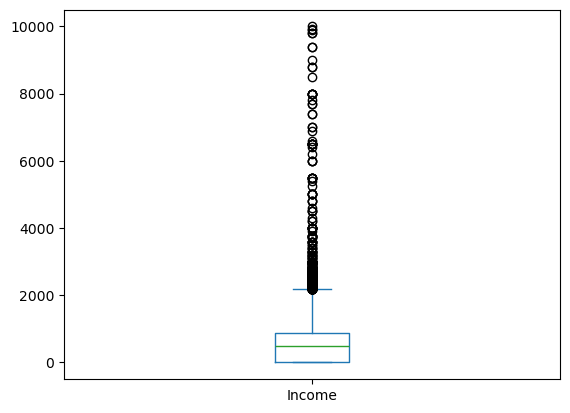

In [124]:
train_copy['Income'].plot(kind='box')

박스를 벗어난 수치가 상당히 많고, 그 간격이 좁다. 어떤게 진짜 이상치인지 판단할 수 없다. 각 피쳐별로 표준편차가 너무 높게 나오는 범주에서 이상치를 찾아보고 제거하는 식으로 해야겠다.

## 범주형 데이터를 수치 데이터로 인코딩하기

### 사이킷런으로 범주형 데이터 전부 레이블 인코딩하기

혹시 train셋에 없는 카테고리가 test셋에 있는지 확인 

In [125]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

In [126]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      10000 non-null  object
 1   Age                     10000 non-null  int64 
 2   Gender                  10000 non-null  object
 3   Education_Status        10000 non-null  object
 4   Employment_Status       10000 non-null  object
 5   Working_Week (Yearly)   10000 non-null  int64 
 6   Industry_Status         10000 non-null  object
 7   Occupation_Status       10000 non-null  object
 8   Race                    10000 non-null  object
 9   Hispanic_Origin         10000 non-null  object
 10  Martial_Status          10000 non-null  object
 11  Household_Status        9999 non-null   object
 12  Household_Summary       10000 non-null  object
 13  Citizenship             10000 non-null  object
 14  Birth_Country           10000 non-null  object
 15  Bir

In [127]:
for cat in categorical_features:
    train_x_value_list = list(train_x[cat].unique())
    test_value_list = list(test[cat].unique())
    for value in test_value_list:
        if value not in train_x_value_list:
            print(cat, ': ', value)

ID :  TEST_0000
ID :  TEST_0001
ID :  TEST_0002
ID :  TEST_0003
ID :  TEST_0004
ID :  TEST_0005
ID :  TEST_0006
ID :  TEST_0007
ID :  TEST_0008
ID :  TEST_0009
ID :  TEST_0010
ID :  TEST_0011
ID :  TEST_0012
ID :  TEST_0013
ID :  TEST_0014
ID :  TEST_0015
ID :  TEST_0016
ID :  TEST_0017
ID :  TEST_0018
ID :  TEST_0019
ID :  TEST_0020
ID :  TEST_0021
ID :  TEST_0022
ID :  TEST_0023
ID :  TEST_0024
ID :  TEST_0025
ID :  TEST_0026
ID :  TEST_0027
ID :  TEST_0028
ID :  TEST_0029
ID :  TEST_0030
ID :  TEST_0031
ID :  TEST_0032
ID :  TEST_0033
ID :  TEST_0034
ID :  TEST_0035
ID :  TEST_0036
ID :  TEST_0037
ID :  TEST_0038
ID :  TEST_0039
ID :  TEST_0040
ID :  TEST_0041
ID :  TEST_0042
ID :  TEST_0043
ID :  TEST_0044
ID :  TEST_0045
ID :  TEST_0046
ID :  TEST_0047
ID :  TEST_0048
ID :  TEST_0049
ID :  TEST_0050
ID :  TEST_0051
ID :  TEST_0052
ID :  TEST_0053
ID :  TEST_0054
ID :  TEST_0055
ID :  TEST_0056
ID :  TEST_0057
ID :  TEST_0058
ID :  TEST_0059
ID :  TEST_0060
ID :  TEST_0061
ID :  TE

train, test의 ID 전체(당연)와 Household_Status중 하나의 nan값 말곤 없는것 같다.  
일단 둘의 ID 피쳐를 삭제해주자

In [128]:
train_x = train_x.drop('ID', axis=1)

In [129]:
test = test.drop('ID', axis=1)

test 데이터의 Household_Status에서 nan값을 갖는 샘플을 확인하자

In [130]:
test[test.Household_Status.isna()]

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
2659,20,F,College,Children or Armed Forces,0,Not in universe or children,Unknown,Black,All other,Single,...,Other relative of householder,Native,US,US,US,Nonfiler,0,0,0,Under Median


인적사항을 보니 20세 여성, 대학생, 일하지 않고, 미국인이다. 또한  
Household_Summary: Other relative of householder이다.  
대체해줄 수 있는 값을 찾기 위해 Household_Status의 카테고리를 보자

In [131]:
test['Household_Status'].unique()

array(['Nonfamily householder', 'Child 18+ never marr Not in a subfamily',
       'Spouse of householder', 'Child <18 never marr not in subfamily',
       'Householder', 'Secondary individual',
       'Child under 18 of Responsible Person of unrelated subfamily',
       'Other Relative <18 never married child of subfamily Responsible Person',
       'Grandchild <18 never married child of subfamily Responsible Person',
       'In group quarters',
       'Other Relative 18+ spouse of subfamily Responsible Person',
       'Child 18+ ever marr Not in a subfamily',
       'Other Rel 18+ never marr not in subfamily',
       'Child 18+ ever married Responsible Person of subfamily',
       'Grandchild 18+ never marr not in subfamily',
       'Grandchild <18 never marr not in subfamily',
       'Other Relative 18+ ever married Responsible Person of subfamily',
       'Child 18+ never married Responsible Person of subfamily',
       'Other Rel 18+ ever marr not in subfamily',
       'Responsible

Other Relative 18+ never married Responsible Person of subfamily로 넣어주자

In [132]:
test['Household_Status'][2659] = 'Other Relative 18+ never married Responsible Person of subfamily'

C:\Users\82102\AppData\Local\Temp\ipykernel_23092\2162220367.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Household_Status'][2659] = 'Other Relative 18+ never married Responsible Person of subfamily'
C:\Users\82102\AppData\Local

다시 범주형과 수치형 데이터를 나눠서 각각 리스트로 만들어주고

In [133]:
categorical_features = [col for col in train_x.columns if train_x[col].dtype == 'object']
numerical_features = [col for col in train_x.columns if train_x[col].dtype == 'int64']

In [134]:
from sklearn.preprocessing import LabelEncoder

In [135]:
# 입력(value_list)으로는 레이블 인코딩을 적용하고싶은 column의 모든 value를 list로 넣어주면 됨
# 출력은 해당 피쳐의 value들을 학습한 encoder임
def label_encoder(value_list):
    encoder = LabelEncoder()
    encoder.fit(value_list)
    return encoder

# # 입력(category, value_list)로는 레이블 인코딩을 원하는 column의 이름과 그에 속한 모든 value의 list를 넣어주면 됨
# # 출력은 없고, 함수 내에서 모두 처리됨
# def label_encoder(category, value_list):
#     encoder = LabelEncoder()
#     encoder.fit(value_list)
#     labels_train_x = encoder.transform(value_list)
#     labels_test = encoder.transform(list(test[category]))
#     train_x[category] = labels_train_x
#     test[category] = labels_test

In [136]:
for category in categorical_features:
    value_list_train_x = list(train_x[category])
    value_list_test = list(test[category])
    encoder_trained = label_encoder(value_list_train_x)
    train_x[category] = encoder_trained.transform(value_list_train_x)
    test[category] = encoder_trained.transform(value_list_test)

# for category in categorical_features:
#     value_list = list(train_x[category])
#     label_encoder(category, value_list)

In [137]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     20000 non-null  int64
 1   Gender                  20000 non-null  int32
 2   Education_Status        20000 non-null  int32
 3   Employment_Status       20000 non-null  int32
 4   Working_Week (Yearly)   20000 non-null  int64
 5   Industry_Status         20000 non-null  int32
 6   Occupation_Status       20000 non-null  int32
 7   Race                    20000 non-null  int32
 8   Hispanic_Origin         20000 non-null  int32
 9   Martial_Status          20000 non-null  int32
 10  Household_Status        20000 non-null  int32
 11  Household_Summary       20000 non-null  int32
 12  Citizenship             20000 non-null  int32
 13  Birth_Country           20000 non-null  int32
 14  Birth_Country (Father)  20000 non-null  int32
 15  Birth_Country (Moth

In [138]:
train_x.head()

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,63,1,15,2,4,20,11,4,0,1,...,4,2,39,39,39,4,0,0,0,2
1,37,1,1,2,52,6,11,4,0,4,...,4,2,39,39,39,5,0,0,0,1
2,58,0,12,2,52,11,0,1,0,1,...,4,2,39,39,39,2,3411,0,0,1
3,44,1,12,2,52,19,12,4,0,0,...,4,2,39,39,39,5,0,0,0,1
4,37,0,12,2,52,19,10,4,0,0,...,4,2,39,39,39,0,0,0,0,2


In [139]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     10000 non-null  int64
 1   Gender                  10000 non-null  int32
 2   Education_Status        10000 non-null  int32
 3   Employment_Status       10000 non-null  int32
 4   Working_Week (Yearly)   10000 non-null  int64
 5   Industry_Status         10000 non-null  int32
 6   Occupation_Status       10000 non-null  int32
 7   Race                    10000 non-null  int32
 8   Hispanic_Origin         10000 non-null  int32
 9   Martial_Status          10000 non-null  int32
 10  Household_Status        10000 non-null  int32
 11  Household_Summary       10000 non-null  int32
 12  Citizenship             10000 non-null  int32
 13  Birth_Country           10000 non-null  int32
 14  Birth_Country (Father)  10000 non-null  int32
 15  Birth_Country (Mothe

In [140]:
test.head()

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,79,1,9,0,0,14,14,4,0,5,...,4,2,39,40,40,5,0,0,0,1
1,47,1,7,0,0,14,14,4,8,5,...,0,2,39,39,39,4,0,0,0,1
2,18,0,9,0,52,19,11,4,0,5,...,0,2,39,39,39,5,0,0,0,1
3,39,0,1,2,30,12,11,4,0,1,...,7,2,39,39,39,2,0,0,0,2
4,6,1,3,0,0,14,14,4,6,5,...,2,2,39,39,39,4,0,0,0,2


## 수치형 데이터 정규화, 범주화는 트리 알고리즘에서 그다지 필요 없으므로 건너뜀

## 데이터 저장 건너뛰고 바로 학습으로

# 학습

## RandomForestRegressor

### 단순 학습 (581.97072 점)

In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# import pandas as pd
# import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [142]:
# x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
# model_RFR = RandomForestRegressor() 
# model_RFR.fit(x_train, y_train)

RandomForestRegressor()

In [143]:
# preds_RFR = model_RFR.predict(x_test)

# print(((y_test - preds_RFR)**2).mean() ** (1/2))

615.1669739210869


In [144]:
model_RFR = RandomForestRegressor()
model_RFR.fit(train_x, train_y)
preds_RFR = model_RFR.predict(test)

In [145]:
submission = pd.read_csv('C:\\Users\\82102\\Desktop\\Machine_Learning\\DACON_materials\\Income_Prediction\\sample_submission.csv')
submission['Income'] = preds_RFR
submission

,ID,Income
0,TEST_0000,0.000000
1,TEST_0001,0.000000
2,TEST_0002,472.108333
3,TEST_0003,572.270000
4,TEST_0004,0.000000
...,...,...
9995,TEST_9995,872.530000
9996,TEST_9996,895.940000
9997,TEST_9997,440.300000
9998,TEST_9998,0.000000


In [68]:
# submission.to_csv('./submission2_1.csv', index=False)

### Income에 로그스케일 적용한 후 학습(자체평가 결과 756.6610665897884점. 제출 안함)

In [146]:
train_y = np.log(train_y + 1)

In [147]:
train_y

0        6.054439
1        0.000000
2        6.758095
3        6.746412
4        6.347389
           ...   
19995    7.170888
19996    6.746412
19997    6.907755
19998    0.000000
19999    6.510258
Name: Income, Length: 20000, dtype: float64

In [148]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
model_RFR = RandomForestRegressor() 
model_RFR.fit(x_train, y_train)

RandomForestRegressor()

In [150]:
preds_RFR = model_RFR.predict(x_test)

print(((np.exp(y_test) - 1 - np.exp(preds_RFR) - 1)**2).mean() ** (1/2))

756.6610665897884


In [72]:
model_RFR = RandomForestRegressor()
model_RFR.fit(train_x, train_y) 

RandomForestRegressor()

In [75]:
preds_RFR = model_RFR.predict(test)

In [76]:
submission = pd.read_csv('C:\\Users\\82102\\Desktop\\Machine_Learning\\DACON_materials\\Income_Prediction\\sample_submission.csv')
submission['Income'] = np.exp(preds_RFR) - 1
submission

,ID,Income
0,TEST_0000,0.000000
1,TEST_0001,0.000000
2,TEST_0002,388.255815
3,TEST_0003,271.074915
4,TEST_0004,0.000000
...,...,...
9995,TEST_9995,140.467390
9996,TEST_9996,593.288531
9997,TEST_9997,285.090652
9998,TEST_9998,0.000000


In [77]:
submission.to_csv('./submission2_2.csv', index=False)

### ID

In [71]:
test_copy = test_copy.drop('ID', axis=1)

NameError: name 'test_copy' is not defined

### Gender

In [ ]:
test_copy['Gender'].replace({'M':1,'F':0}, inplace=True)

### Education_Status

In [ ]:
test_copy['No_Income_Level'] = test_copy['Education_Status']

In [ ]:
test_copy['No_Income_Level'].replace({'Children': 0, 
                                       'Doctorate degree': 1, 
                                       'Professional degree': 1, 
                                       'Kindergarten' : 1, 
                                       'Masters degree': 2, 
                                       'Middle (7-8)': 2, 
                                       'Elementary (1-4)': 2, 
                                       'Elementary (5-6)': 2, 
                                       'High Freshman' : 2, 
                                       'Bachelors degree': 3, 
                                       'High Sophomore': 3, 
                                       'High Senior': 3, 
                                       'Associates degree (Academic)': 4, 
                                       'High Junior': 4, 
                                       'High graduate': 4, 
                                       'College': 4, 
                                       'Associates degree (Vocational)' : 4}, 
                                      inplace=True)

In [ ]:
test_copy['Education_Status'].replace({'Children': 0, 
                                       'Doctorate degree': 1, 
                                       'Professional degree': 1, 
                                       'Kindergarten' : 1, 
                                       'Masters degree': 1, 
                                       'Middle (7-8)': 1, 
                                       'Elementary (1-4)': 1, 
                                       'Elementary (5-6)': 1, 
                                       'High Freshman' : 1, 
                                       'Bachelors degree': 1, 
                                       'High Sophomore': 1, 
                                       'High Senior': 1, 
                                       'Associates degree (Academic)': 1, 
                                       'High Junior': 1, 
                                       'High graduate': 1, 
                                       'College': 1, 
                                       'Associates degree (Vocational)' : 1}, 
                                       inplace = True)

### Employment_Status

In [ ]:
test_copy['Employment_Status'].replace({'Full-Time': 1, 
                                         'Children or Armed Forces': 3, 
                                         'Not Working': 0, 
                                         'Seeking Full-Time': 4, 
                                         'Choice Part-Time': 4, 
                                         'Part-Time (Usually Part-Time)': 4, 
                                         'Part-Time (Usually Full-Time)': 4, 
                                         'Seeking Part-Time': 2}, 
                                         inplace = True)

### Industry_Status

In [ ]:
Industry_list_test = list(test_copy['Industry_Status'].unique())

In [ ]:
for industry in Industry_list_test:
    if industry == 'Not in universe or children':
        test_copy['Industry_Status'].replace({industry: 0}, inplace = True)
    else:
        test_copy['Industry_Status'].replace({industry: 1}, inplace = True)

### Occupation_Status

In [ ]:
Occupation_list_test = list(test_copy['Occupation_Status'].unique())

In [ ]:
one_cold_encoder_test(Occupation_list_test, 'Occupation_Status', 'Unknown')

### Race

In [ ]:
Race_list_test = list(test_copy['Race'].unique())

In [ ]:
one_cold_encoder_test(Race_list_test, 'Race', 'Other')

### Hispanic_Origin

In [ ]:
many_encoder_test('Hispanic_Origin', Hispanic_Origin_diction)

### Martial_Status

In [ ]:
many_encoder_test('Martial_Status', Martial_Status_diction)

### Household_Status

In [ ]:
test_copy = test_copy.drop('Household_Status', axis=1)

### Household_Summary

In [ ]:
many_encoder_test('Household_Summary', Household_Summary_diction)

### Citizenship

In [ ]:
many_encoder_test('Citizenship', Citizenship_diction)

### Birth_Country, Birth_Country (Father), Birth_Country (Mother)

In [ ]:
test_copy = test_copy.drop('Birth_Country', axis=1)

In [ ]:
test_copy = test_copy.drop('Birth_Country (Father)', axis=1)

In [ ]:
test_copy = test_copy.drop('Birth_Country (Mother)', axis=1)

### Tax_Status

In [ ]:
many_encoder_test('Tax_Status', Tax_Status_diction)

### Income_Status

In [ ]:
one_cold_encoder_test(Income_Status_list, 'Income_Status', 'Over Median')

### Age

그대로 둔다

### Working_Week (Yearly)

일단 그대로 둔다

### Gains

In [ ]:
test_copy = test_copy.drop('Gains', axis=1)

### Losses

In [ ]:
test_copy = test_copy.drop('Losses', axis=1)

### Dividends

In [ ]:
test_copy[test_copy['Dividends'] > 34000]

In [ ]:
Dividend_1_list_test = [6100, 5235, 4899, 2811]

In [ ]:
test_copy['Dividends'] = 0

In [ ]:
for ind in Dividend_1_list_test:
    test_copy['Dividends'][ind] = 1